# Group Project Report: How do Song Statistics and Other Musical Elements Correlate to the Number of Spotify Streams?
#### Xuyang Chen, Rachel Weng, Martin Wong, Seabert Yuan
## Introduction
Spotify is a digital music streaming service that allows users to access millions of songs on various devices, including computers, phones, and cars. As of 2024, Spotify is documented as the world’s most popular streaming service, with 350 million active users and 150 million premium subscribers. [(Source)](https://www.cnn.com/cnn-underscored/reviews/best-music-streaming-service#:~:text=Spotify%20is%20the%20most%20popular,users%20and%20150%20million%20subscribers.)

Our project aims to answer the following question: ***How do song statistics and other musical elements correlate to the number of Spotify streams?***

The dataset, from [(Kaggle)](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data), documents the most streamed Spotify songs globally of 2023 obtained using the Spotify API and provides an abundance of information about both the song’s background and musicality. A stream is defined as a user listening to a song for more than 30 seconds. The dataset also provides percentage values from a range of 0 - 100 % of danceability, defined as a track’s suitability for dancing based on musical factors such as tempo, beat strength, rhythmic stability, and overall regularity.

# Methods and Results

## Preliminary Exploratory Data Analysis

An exploration into the relationships between various variables and the number of Spotify streams will be expored to determine which variables should be used as predictors for our regression model. We begin by importing the necessary libraries.

In [1]:
library(tidyverse)
library(tidymodels)
library(reshape2)
library(repr)
options(repr.matrix.max.rows = 8)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Reading the Data from the web Into R

After uploading our onto github, it can be read using R's `read_csv()` function.

In [2]:
spotify_data <- read_csv("https://raw.githubusercontent.com/martin0wong/dsci100_project/main/data/spotify-2023.csv")
spotify_data

Rows: 953 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): track_name, artist(s)_name, streams, key, mode
dbl (17): artist_count, released_year, released_month, released_day, in_spot...
num  (2): in_deezer_playlists, in_shazam_charts

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


track_name                          artist(s)_name     artist_count
1   Seven (feat. Latto) (Explicit Ver.) Latto, Jung Kook   2           
2   LALA                                Myke Towers        1           
3   vampire                             Olivia Rodrigo     1           
4   Cruel Summer                        Taylor Swift       1           
⋮   ⋮                                   ⋮                  ⋮           
950 Bigger Than The Whole Sky           Taylor Swift       1           
951 A Veces (feat. Feid)                Feid, Paulo Londra 2           
952 En La De Ella                       Feid, Sech, Jhayco 3           
953 Alone                               Burna Boy          1           
    released_year released_month released_day in_spotify_playlists
1   2023          7              14            553                
2   2023          3              23           1474                
3   2023          6              30           1397                
4   2019          8              23           7858                
⋮   ⋮             ⋮              ⋮            ⋮                   
950 2022          10             21           1180                
951 2022          11              3            573                
952 2022          10             20           1320                
953 2022          11              4            782                
    in_spotify_charts streams   in_apple_playlists ⋯ bpm key mode 
1   147               141381703  43                ⋯ 125 B   Major
2    48               133716286  48                ⋯  92 C#  Major
3   113               140003974  94                ⋯ 138 F   Major
4   100               800840817 116                ⋯ 170 A   Major
⋮   ⋮                 ⋮         ⋮                  ⋱ ⋮   ⋮   ⋮    
950 0                 121871870  4                 ⋯ 166 F#  Major
951 0                 73513683   2                 ⋯  92 C#  Major
952 0                 133895612 29                 ⋯  97 C#  Major
953 2                 96007391  27                 ⋯  90 E   Minor
    danceability_% valence_% energy_% acousticness_% instrumentalness_%
1   80             89        83       31             0                 
2   71             61        74        7             0                 
3   51             32        53       17             0                 
4   55             58        72       11             0                 
⋮   ⋮              ⋮         ⋮        ⋮              ⋮                 
950 42              7        24       83             1                 
951 80             81        67        4             0                 
952 82             67        77        8             0                 
953 61             32        67       15             0                 
    liveness_% speechiness_%
1    8          4           
2   10          4           
3   31          6           
4   11         15           
⋮   ⋮          ⋮            
950 12         6            
951  8         6            
952 12         5            
953 11         5

### Cleaning and Wrangling

Generally, the data is tidy. We can however, change the names of the columns for clarity and ensure that each column is using the right data type. Since the `released_*` columns do not mean too much for us, we convert them into the number of days from the release day until December 31, 2023 inclusive. This value, calculated by using average days in a year and in a month, gives the number of days the song has been released for (`days_released`). We will then remove any observations that contain missing data as observations missing data may impact correlations within other variables. We will then divide streams by one million for the sake of visualizations. Finally, we will only select columns useful for visualization dropping columns such as the `track_name` or the `artist(s)_name`. Upon conducting preliminary exploratory data analysis, we will use the following variables as predictors for the number of streams (in millions),

- Number of occurrences in Spotify charts
- Number of occurrences in Apple charts
- Number of occurrences in Spotify playlists
- Number of occurrences in Apple playlists
- Track beats per minute (bpm)
- Days since release (days)
- Danceability (%)

 These were chosen as predictors because they are all measured numerically as opposed to categorically, have unambiguous definitions, and show some sort of relationship with the number of streams.

In [20]:
colnames(spotify_data) <- c("track_name", "artist(s)_name", "artist_count", "released_year", "released_month", "released_day", 
                                    "in_spotify_playlists", "in_spotify_charts", "streams", "in_apple_playlists", "in_apple_charts", 
                                    "in_deezer_playlists", "in_deezer_charts", "in_shazam_charts", "bpm", "key", "mode", 
                                    "danceability_percent", "valence_percent", "energy_percent", 
                                    "acousticness_percent", "instrumentalness_percent", "liveness_percent", "speechiness_percent")
spotify_data_wrangled <- spotify_data |>
                         mutate(key = as.factor(key)) |>
                         mutate(mode = as.factor(mode)) |>
                         #avg days in a year/month searched from web
                         mutate(days_released = round((2023-released_year)*365.25 + (12-released_month)*30.436875 + (30.436875-released_day), 0)) |>
                         mutate(across(streams:bpm, as.numeric)) |>
                         mutate(streams = streams/1000000) |>
                         drop_na() |>
                         #removing released_xxx columns as wrangled into days_released
                         select(in_spotify_charts, in_apple_charts, in_spotify_playlists, in_apple_playlists, bpm, days_released, danceability_percent, streams)
spotify_data_wrangled

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(streams:bpm, as.numeric)`.
Caused by warning:
! NAs introduced by coercion”


in_spotify_charts in_apple_charts in_spotify_playlists in_apple_playlists
1   147               263              553                  43               
2    48               126             1474                  48               
3   113               207             1397                  94               
4   100               207             7858                 116               
⋮   ⋮                 ⋮               ⋮                    ⋮                 
813 0                  0              1180                  4                
814 0                  0               573                  2                
815 0                 26              1320                 29                
816 2                 18               782                 27                
    bpm days_released danceability_percent streams  
1   125  169          80                   141.3817 
2    92  281          71                   133.7163 
3   138  183          51                   140.0040 
4   170 1590          55                   800.8408 
⋮   ⋮   ⋮             ⋮                    ⋮        
813 166 436           42                   121.87187
814  92 423           80                    73.51368
815  97 437           82                   133.89561
816  90 422           61                    96.00739

### Exploratory Data Analysis

First we set the seed for reproducibility. We will split the wrangled data such that 75% of the data will be used for training and the remaining 25% for testing. Then we summarize our data showing the average values for a certain bpm.

In [22]:
set.seed(15)
spotify_split <- initial_split(spotify_data_wrangled, prop = 0.75, strata = streams)
spotify_train <- training(spotify_split)
spotify_test <- testing(spotify_split)

spotify_summary <- merge(spotify_train |> group_by(bpm) |> summarize(across(in_spotify_charts:in_apple_playlists ,mean)),
                         spotify_train |> group_by(bpm) |> summarize(across(days_released:streams ,mean)))
spotify_summary <- merge(spotify_summary, spotify_train |> group_by(bpm) |> summarize(count = n()) |> arrange(bpm) |> select(bpm,count))
spotify_summary

bpm in_spotify_charts in_apple_charts in_spotify_playlists
1   65   0                63              1127                
2   67  47                86              3408                
3   71   0                11               461                
4   72   0                 0              1480                
⋮   ⋮   ⋮                 ⋮               ⋮                   
112 198 56                 64             3506                
113 202  0                107             8879                
114 204 19                107             2420                
115 206 23                110             8448                
    in_apple_playlists days_released danceability_percent streams   count
1   16                 387           71                   110.84905 1    
2   87                 311           53                   518.74511 1    
3    7                 667           59                    94.61649 1    
4    1                 596           56                    61.73984 1    
⋮   ⋮                  ⋮             ⋮                    ⋮         ⋮    
112 105                  394         59                   373.2000  1    
113 182                21992         24                   663.8321  1    
114  52                  334         52                   429.8298  1    
115 160                 4382         43                   882.8312  1

### Exploratory Data Visualization

With our training data, we can visualize how each predictor affects the number of Spotify streams. We will accomplish this using `ggpairs` to create a pairplot. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


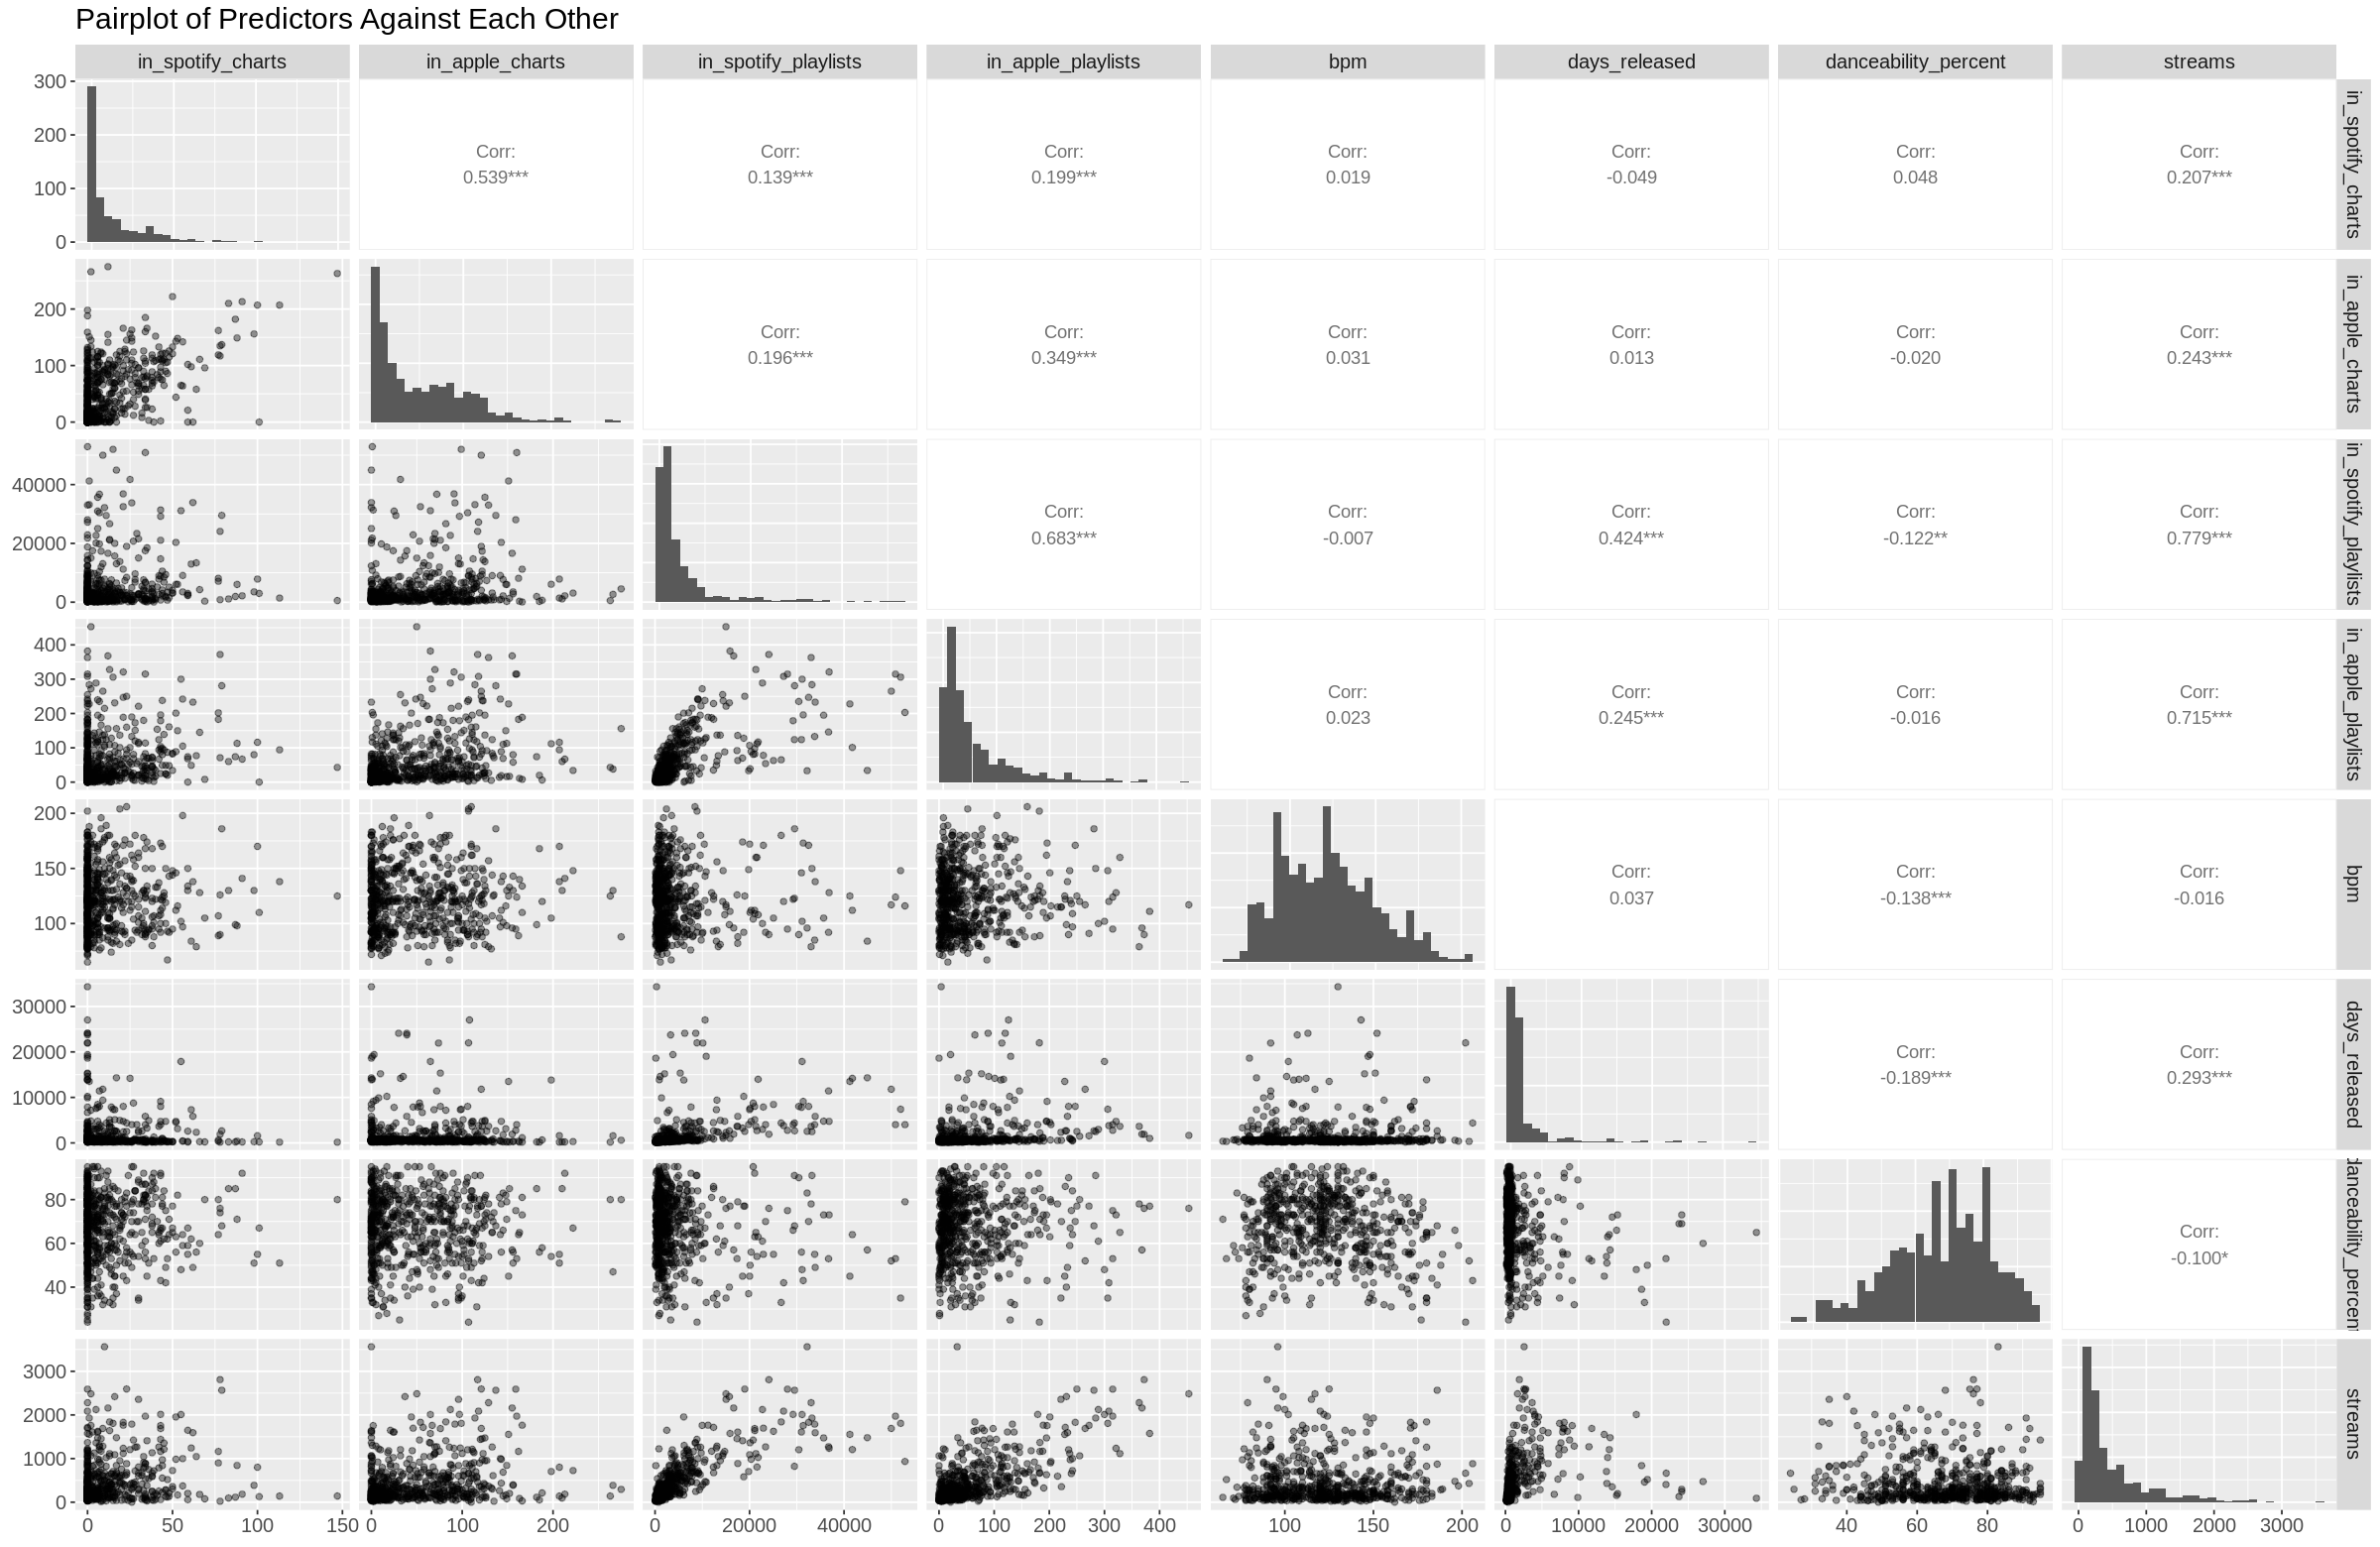

In [25]:
options(repr.plot.width=20, repr.plot.height=13)
library(GGally)
spotify_pair_plot <- spotify_train |> 
     ggpairs(
         lower = list(continuous = wrap('points', alpha = 0.4)),
         diag = list(continuous = "barDiag")
     ) +
     theme(text = element_text(size = 15)) +
     ggtitle("Pairplot of Predictors Against Each Other")
spotify_pair_plot

## Data Analysis

With our preliminary data analysis done, we may begin to perform KNN regression on our training data.

### 1. Number of occurrences in Spotify charts vs Streams

In [ ]:
Spotify_charts_recipe <- recipe(streams ~ in_spotify_charts, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Spotify_charts_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

Spotify_charts_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

Spotify_charts_wkflw <- workflow() |>
  add_recipe(Spotify_charts_recipe) |>
  add_model(Spotify_charts_spec)

Spotify_charts_wkflw

In [ ]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
Spotify_charts_results <- Spotify_charts_wkflw |>
  tune_grid(resamples = Spotify_charts_vfold, grid = gridvals) |>
  collect_metrics()
Spotify_charts_results

Spotify_charts_min <- Spotify_charts_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
Spotify_charts_min

In [ ]:
k_Spotify_charts_min <- Spotify_charts_min |>
         pull(neighbors)

Spotify_charts_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_Spotify_charts_min) |>
         set_engine("kknn") |>
         set_mode("regression")

Spotify_charts_best_fit <- workflow() |>
         add_recipe(Spotify_charts_recipe) |>
         add_model(Spotify_charts_best_spec) |>
         fit(data = spotify_train)

Spotify_charts_summary <- Spotify_charts_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
Spotify_charts_summary

Spotify_charts_preds <- Spotify_charts_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
Spotify_charts_preds

## 2. Number of occurrences in Apple charts

In [ ]:
Apple_charts_recipe <- recipe(streams ~ in_apple_charts, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Apple_charts_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

Apple_charts_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

Apple_charts_wkflw <- workflow() |>
  add_recipe(Apple_charts_recipe) |>
  add_model(Apple_charts_spec)

Apple_charts_wkflw

In [ ]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
Apple_charts_results <- Apple_charts_wkflw |>
  tune_grid(resamples = Apple_charts_vfold, grid = gridvals) |>
  collect_metrics()
Apple_charts_results

Apple_charts_min <- Apple_charts_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
Apple_charts_min

In [ ]:
k_Apple_charts_min <- Apple_charts_min |>
         pull(neighbors)

Apple_charts_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_Apple_charts_min) |>
         set_engine("kknn") |>
         set_mode("regression")

Apple_charts_best_fit <- workflow() |>
         add_recipe(Apple_charts_recipe) |>
         add_model(Apple_charts_best_spec) |>
         fit(data = spotify_train)

Apple_charts_summary <- Apple_charts_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
Apple_charts_summary

Apple_charts_preds <- Apple_charts_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
Apple_charts_preds

## 3. Number of occurrences in Spotify playlists

In [ ]:
Spotify_playlists_recipe <- recipe(streams ~ in_spotify_playlists, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Spotify_playlists_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

Spotify_playlists_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

Spotify_playlists_wkflw <- workflow() |>
  add_recipe(Spotify_playlists_recipe) |>
  add_model(Spotify_playlists_spec)

Spotify_playlists_wkflw

In [ ]:
gridvals <- tibble(neighbors = seq(from = 12, to = 102, by = 10))
Spotify_playlists_results <- Spotify_playlists_wkflw |>
  tune_grid(resamples = Spotify_playlists_vfold, grid = gridvals) |>
  collect_metrics()
Spotify_playlists_results

Spotify_playlists_min <- Spotify_playlists_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
Spotify_playlists_min

In [ ]:
k_Spotify_playlists_min <- Spotify_playlists_min |>
         pull(neighbors)

Spotify_playlists_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_Spotify_playlists_min) |>
         set_engine("kknn") |>
         set_mode("regression")

Spotify_playlists_best_fit <- workflow() |>
         add_recipe(Spotify_playlists_recipe) |>
         add_model(Spotify_playlists_best_spec) |>
         fit(data = spotify_train)

Spotify_playlists_summary <- Spotify_playlists_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
Spotify_playlists_summary

Spotify_playlists_preds <- Spotify_playlists_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
Spotify_playlists_preds

## 4. Number of occurrences in Apple playlists

In [ ]:
Apple_playlists_recipe <- recipe(streams ~ in_apple_playlists, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Apple_playlists_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

Apple_playlists_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

Apple_playlists_wkflw <- workflow() |>
  add_recipe(Apple_playlists_recipe) |>
  add_model(Apple_playlists_spec)

Apple_playlists_wkflw

In [ ]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
Apple_playlists_results <- Apple_playlists_wkflw |>
  tune_grid(resamples = Apple_playlists_vfold, grid = gridvals) |>
  collect_metrics()
Apple_playlists_results

Apple_playlists_min <- Apple_playlists_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
Apple_playlists_min

In [ ]:
k_Apple_playlists_min <- Apple_playlists_min |>
         pull(neighbors) 

Apple_playlists_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_Apple_playlists_min) |>
         set_engine("kknn") |>
         set_mode("regression")

Apple_playlists_best_fit <- workflow() |>
         add_recipe(Apple_playlists_recipe) |>
         add_model(Apple_playlists_best_spec) |>
         fit(data = spotify_train)

Apple_playlists_summary <- Apple_playlists_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
Apple_playlists_summary

Apple_playlists_preds <- Apple_playlists_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
Apple_playlists_preds

## 5. Track beats per minute

In [ ]:
bpm_recipe <- recipe(streams ~ bpm, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

bpm_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

bpm_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

bpm_wkflw <- workflow() |>
  add_recipe(bpm_recipe) |>
  add_model(bpm_spec)

bpm_wkflw

In [ ]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
bpm_results <- bpm_wkflw |>
  tune_grid(resamples = bpm_vfold, grid = gridvals) |>
  collect_metrics()
bpm_results

bpm_min <- bpm_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
bpm_min

In [ ]:
k_bpm_min <- bpm_min |>
         pull(neighbors) 

bpm_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_bpm_min) |>
         set_engine("kknn") |>
         set_mode("regression")

bpm_best_fit <- workflow() |>
         add_recipe(bpm_recipe) |>
         add_model(bpm_best_spec) |>
         fit(data = spotify_train)

bpm_summary <- bpm_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
bpm_summary

bpm_preds <- bpm_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
bpm_preds

## 6. Days since release

In [ ]:
days_released_recipe <- recipe(streams ~ days_released, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

days_released_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

days_released_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

days_released_wkflw <- workflow() |>
  add_recipe(days_released_recipe) |>
  add_model(days_released_spec)

days_released_wkflw

In [ ]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
days_released_results <- days_released_wkflw |>
  tune_grid(resamples = days_released_vfold, grid = gridvals) |>
  collect_metrics()
days_released_results

days_released_min <- days_released_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
days_released_min

In [ ]:
k_days_released_min <- days_released_min |>
         pull(neighbors) 

days_released_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_days_released_min) |>
         set_engine("kknn") |>
         set_mode("regression")

days_released_best_fit <- workflow() |>
         add_recipe(days_released_recipe) |>
         add_model(days_released_best_spec) |>
         fit(data = spotify_train)

days_released_summary <- days_released_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
days_released_summary

days_released_preds <- days_released_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
days_released_preds

## 7. Danceability (%)

In [ ]:
danceability_recipe <- recipe(streams ~ danceability_percent, data = spotify_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

danceability_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

danceability_vfold <- vfold_cv(spotify_train, v = 5, strata = streams)

danceability_wkflw <- workflow() |>
  add_recipe(danceability_recipe) |>
  add_model(danceability_spec)

danceability_wkflw

In [ ]:
gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 10))
danceability_results <- danceability_wkflw |>
  tune_grid(resamples = danceability_vfold, grid = gridvals) |>
  collect_metrics()
danceability_results

danceability_min <- danceability_results |>
   filter(.metric == "rmse") |>
   slice_min(std_err, n = 1)
danceability_min

In [ ]:
k_danceability_min <- danceability_min |>
         pull(neighbors) 

danceability_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_danceability_min) |>
         set_engine("kknn") |>
         set_mode("regression")

danceability_best_fit <- workflow() |>
         add_recipe(danceability_recipe) |>
         add_model(danceability_best_spec) |>
         fit(data = spotify_train)

danceability_summary <- danceability_best_fit |>
          predict(spotify_test) |>
          bind_cols(spotify_test) |>
          metrics(truth = streams, estimate = .pred)
danceability_summary

danceability_preds <- danceability_best_fit |>
  predict(spotify_train) |>
  bind_cols(spotify_train)
danceability_preds

# Visualization of the analysis

## 1. Number of occurrences in Spotify charts vs Streams

In [ ]:
options(repr.plot.height = 7, repr.plot.width = 12)
Spotify_charts_plot <- ggplot(Spotify_charts_preds, aes(x = in_spotify_charts, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Spotify_charts_preds,
            mapping = aes(x = in_spotify_charts, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Number of occurrences in Spotify charts") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_Spotify_charts_min)) +
theme(text = element_text(size = 12))
Spotify_charts_plot

## 2. Number of occurrences in Apple charts

In [ ]:
options(repr.plot.height = 7, repr.plot.width = 12)
Apple_charts_plot <- ggplot(Apple_charts_preds, aes(x = in_apple_charts, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Apple_charts_preds,
            mapping = aes(x = in_apple_charts, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Number of occurrences in Apple charts") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_Apple_charts_min)) +
theme(text = element_text(size = 12))
Apple_charts_plot 

## 3. Number of occurrences in Spotify playlists

In [ ]:
options(repr.plot.height = 7, repr.plot.width = 12)
Spotify_playlists_plot <- ggplot(Spotify_playlists_preds, aes(x = in_spotify_playlists, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Spotify_playlists_preds,
            mapping = aes(x = in_spotify_playlists, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Number of occurrences in Spotify playlists") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_Spotify_playlists_min)) +
theme(text = element_text(size = 12))
Spotify_playlists_plot

## 4. Number of occurrences in Apple playlists

In [ ]:
options(repr.plot.height = 7, repr.plot.width = 12)
Apple_playlists_plot <- ggplot(Apple_playlists_preds, aes(x = in_apple_playlists, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = Apple_playlists_preds,
            mapping = aes(x = in_apple_playlists, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Number of occurrences in Apple playlists") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_Apple_playlists_min)) +
theme(text = element_text(size = 12))
Apple_playlists_plot 

## 5. Track beats per minute

In [ ]:
options(repr.plot.height = 7, repr.plot.width = 12)
bpm_plot <- ggplot(bpm_preds, aes(x = bpm, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = bpm_preds,
            mapping = aes(x = bpm, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Track beats per minute") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_bpm_min)) +
theme(text = element_text(size = 12))
bpm_plot 

## 6. Days since release

In [ ]:
options(repr.plot.height = 7, repr.plot.width = 12)
days_released_plot <- ggplot(days_released_preds, aes(x = days_released, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = days_released_preds,
            mapping = aes(x = days_released, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Days since release") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_days_released_min)) +
theme(text = element_text(size = 12))
days_released_plot

## 7. Danceability (%)

In [ ]:
options(repr.plot.height = 7, repr.plot.width = 12)
danceability_plot <- ggplot(danceability_preds, aes(x = danceability_percent, y = streams)) +
  geom_point(alpha = 0.4) +
  geom_line(data = danceability_preds,
            mapping = aes(x = danceability_percent, y = .pred),
            color = "blue",
            linewidth = 1) +
  xlab("Danceability (%)") +
  ylab("Number of streams on Spotify (in million)") +
  ggtitle(paste0("K = ", k_danceability_min)) +
theme(text = element_text(size = 12))
danceability_plot

## Try linear regression for Spotify playlists predictor.

In [ ]:
lm_spotify_playlists_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

lm_recipe <- recipe(streams ~ in_spotify_playlists, data = spotify_train)

lm_fit <- workflow() |>
    add_recipe(lm_recipe) |>
    add_model(lm_spotify_playlists_spec) |>
    fit(data = spotify_train)

lm_fit

In [ ]:
options(repr.plot.height = 7, repr.plot.width = 12)
spotify_playlists_preds <- lm_fit |>
    predict(spotify_train) |>
    bind_cols(spotify_train)

lm_test_result <- lm_fit |>
    predict(spotify_test) |>
    bind_cols(spotify_test)

lm_predictions_spotify_playlists_plot <- lm_test_result |>
    ggplot(aes(x=in_spotify_playlists, y=streams)) +
        geom_point(alpha = 0.4) +
        geom_line(
            mapping = aes(x=in_spotify_playlists, y=.pred),
            color = "blue") +
        xlab("Number of occurrences in Spotify playlists") +
        ylab("Number of streams on Spotify (in millions)") +
        theme(text=element_text(size=20))
lm_predictions_spotify_playlists_plot


# Discussion

summarize what you found\
discuss whether this is what you expected to find\
discuss what impact could such findings have\
discuss what future questions could this lead to

# References

Elgiriyewithana, N. (2023, August 26). *Most streamed Spotify Songs 2023.* Most Streamed Spotify Songs 2023. https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023 \
Interiano, M., Kazemi, K., Wang, L., Yang, J., Yu, Z., & Komarova, N. L. (2018). Musical trends and predictability of success in contemporary songs in and out of the top charts. *Royal Society Open Science*, *5*(5), 171274. https://doi.org/10.1098/rsos.171274 